### Drop Duplicates and Keep Last Row

In [27]:
num_dups = len(train_val_df)-len(train_val_df.drop_duplicates(keep='last'))
num_dups

0

### MAE&MAPE

In [10]:
def mape(Y_actual,Y_Predicted, fill_val):
    Y_actual[Y_actual == 0] = fill_val
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

replc_val_mape = 1

X_train_flt = X_train.flatten()
X_val_flt = X_val.flatten()
x_train_pred_flt = x_train_pred.flatten()
x_val_pred_flt = x_val_pred.flatten()

mae_train = mean_squared_error(X_train_flt, x_train_pred_flt)
print(f'mae_train : {mae_train}\n')

mae_val = mean_squared_error(X_val_flt, x_val_pred_flt)
print(f'mae_val : {mae_val}\n')

mape_train = mape(X_train_flt,x_train_pred_flt, replc_val_mape)
print(f'mape_train : {mape_train}\n')

mape_val = mape(X_val_flt,x_val_pred_flt, replc_val_mape)
print(f'mape_val : {mape_val}\n')

mae_train : 0.08832948762110147

mae_val : 0.0882832208018404

mape_train : 179.99003167909646

mape_val : 179.92056457811185



#### replace with mean values

In [11]:
mean_arr_train = X_train_flt.copy()
mean_arr_train[:] = np.mean(X_train_flt)
mean_arr_val = X_val_flt.copy()
mean_arr_val[:] = np.mean(X_val_flt)

mae_train_mean = mean_squared_error(X_train_flt, mean_arr_train)
print(f'mae_train_mean : {mae_train_mean}\n')

mae_val_mean = mean_squared_error(X_val_flt, mean_arr_val)
print(f'mae_val_mean : {mae_val_mean}\n')

mape_train_mean = mape(X_train_flt,mean_arr_train, replc_val_mape)
print(f'mape_train_mean : {mape_train_mean}\n')

mape_val_mean = mape(X_val_flt,mean_arr_val, replc_val_mape)
print(f'mape_val_mean : {mape_val_mean}\n')


mae_train_mean : 0.08492566129507703

mae_val_mean : 0.08513012159121099

mape_train_mean : 192.78838256172054

mape_val_mean : 192.4521249610493



In [12]:
mae_tr = []
mape_tr = []
for c in range(X_train.shape[1]):
    x_col = X_train[:,c]
    x_pred_col = x_train_pred[:,c]
    mae_col = mean_squared_error(x_col, x_pred_col)
    mae_tr.append(mae_col)
    mape_col = mape(x_col,x_pred_col, replc_val_mape)
    mape_tr.append(mape_col)
mae_val = []
mape_val = []
for c in range(X_val.shape[1]):
    x_col = X_val[:,c]
    x_pred_col = x_val_pred[:,c]
    mae_col = mean_squared_error(x_col, x_pred_col)
    mae_val.append(mae_col)
    mape_col = mape(x_col,x_pred_col, replc_val_mape)
    mape_val.append(mape_col)

In [16]:
column_error = pd.DataFrame({'mae_train':mae_tr, 'mae_val':mae_val, 'mape_train':mape_tr, 'mape_val': mape_val })
column_error

,mae_train,mae_val,mape_train,mape_val
0,0.087556,0.084376,187.355473,173.562707
1,0.086084,0.084607,188.827014,186.422309
2,0.092914,0.089028,170.363656,177.043477
3,0.084519,0.082097,177.066770,177.032468
4,0.091134,0.090635,183.395867,194.512908
5,0.084378,0.087932,180.935174,197.646396
6,0.090254,0.091749,179.999680,209.001293
7,0.080750,0.078357,162.192989,166.616006
8,0.088305,0.091112,165.741936,170.719275
9,0.096667,0.091135,182.682790,177.133936


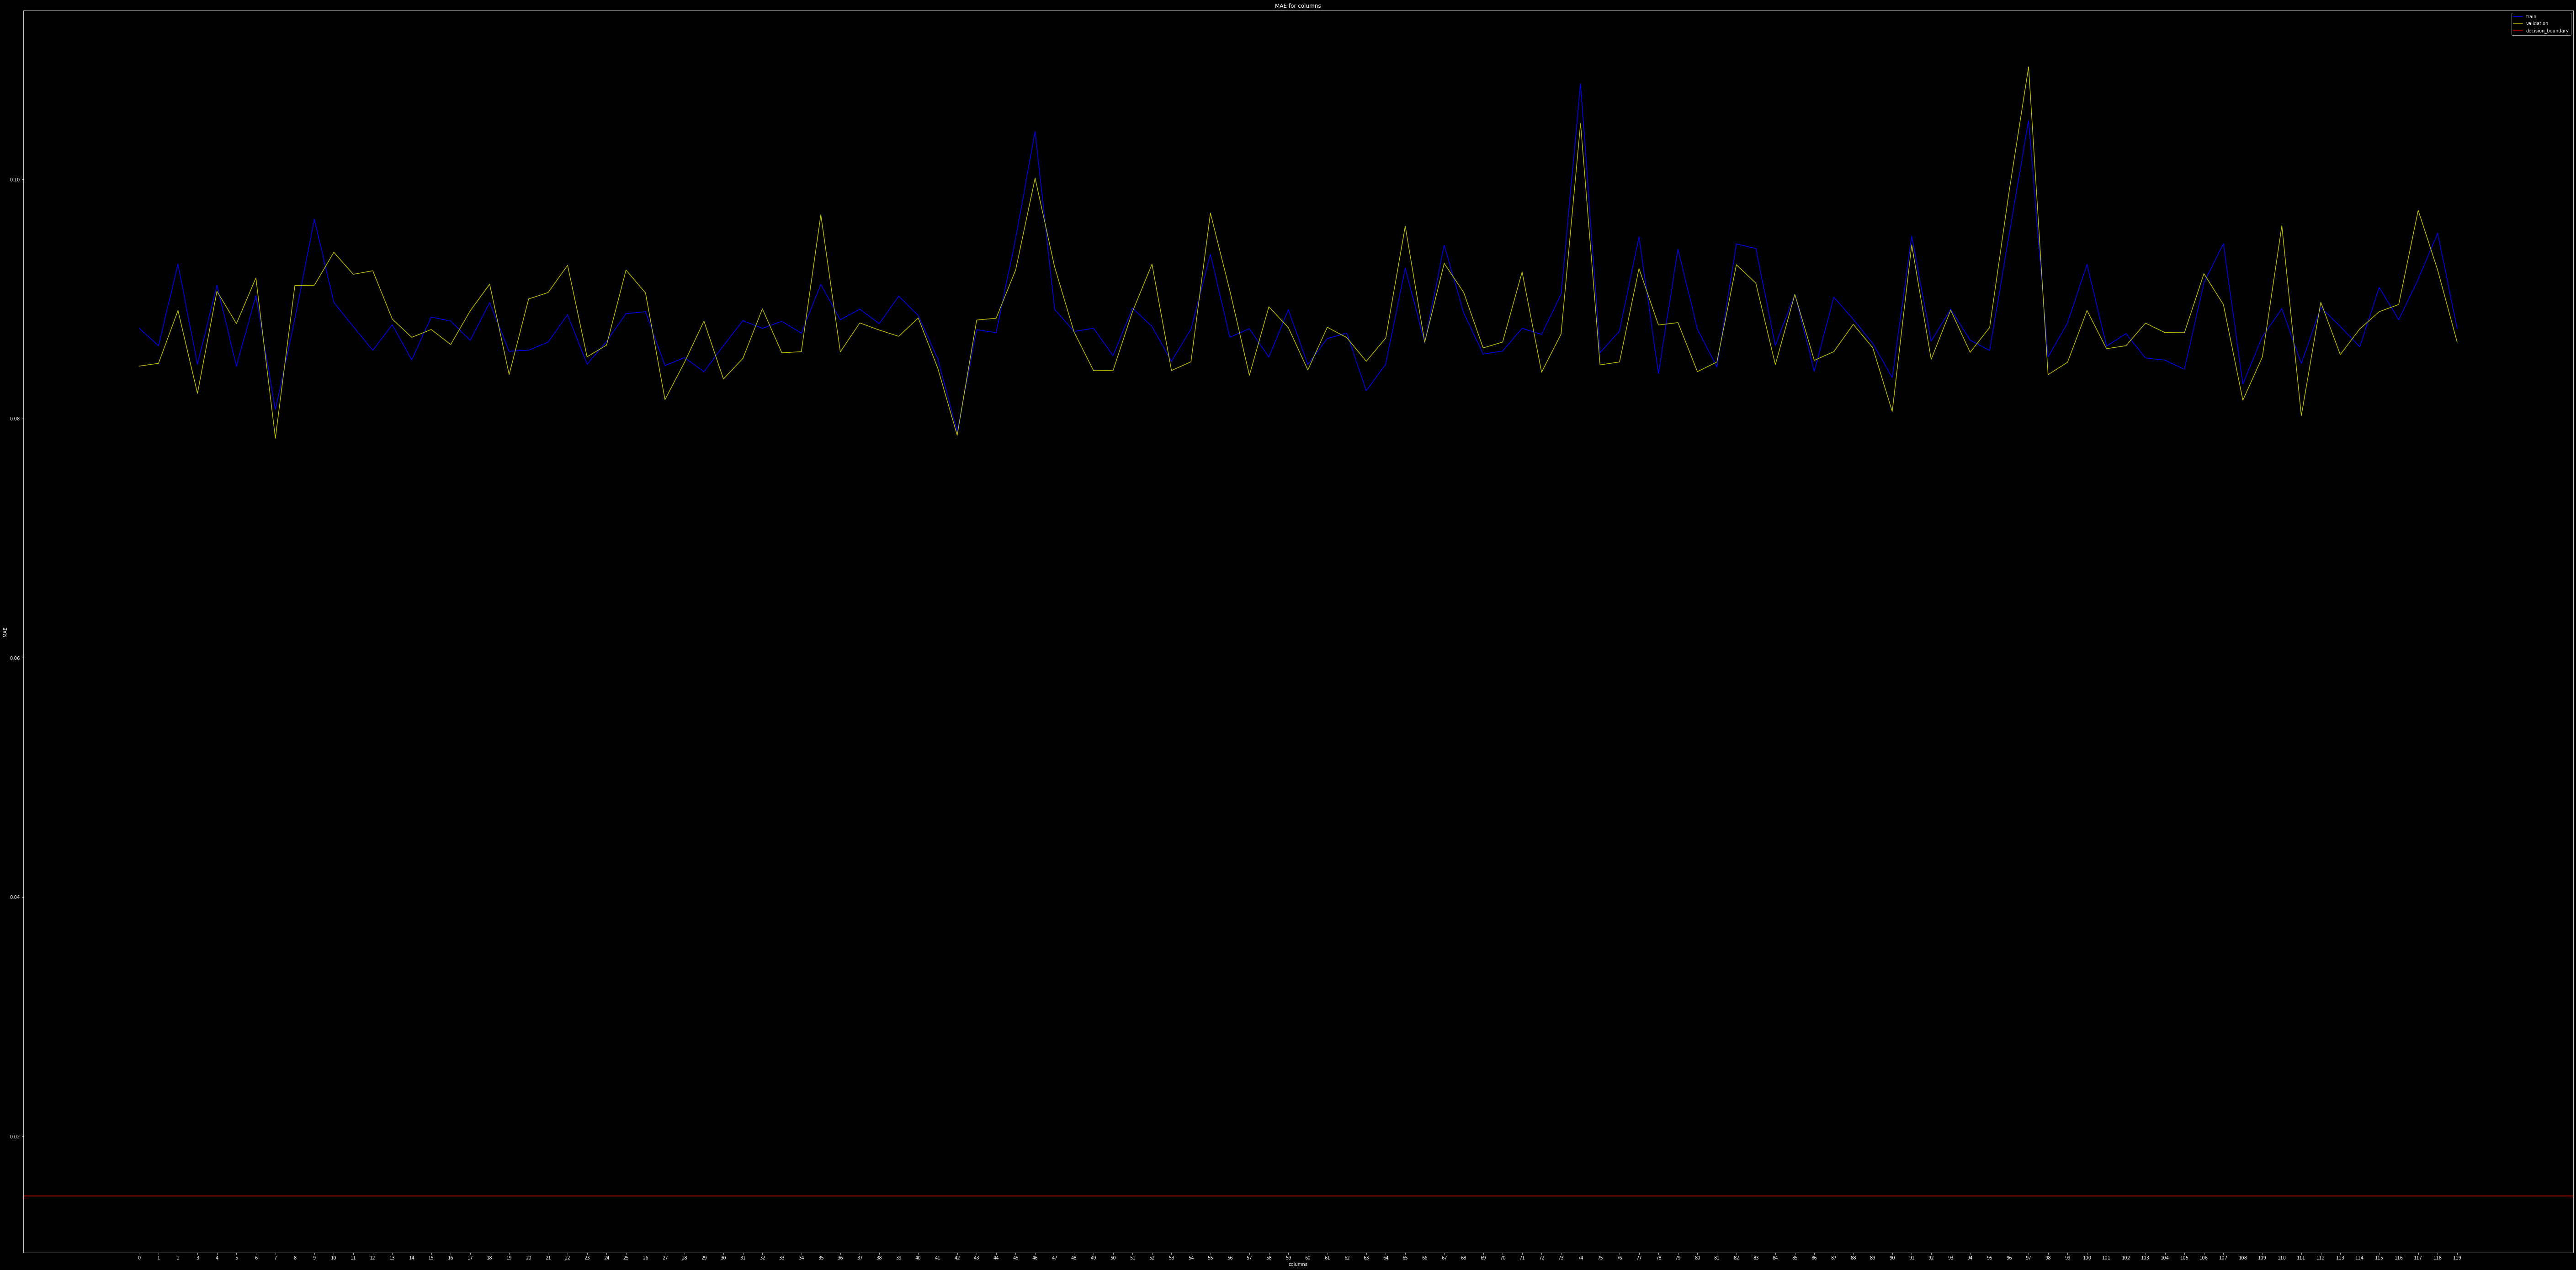

In [19]:
plt.figure(figsize=(100,50))
plt.plot( mae_tr, c = 'b', label='train')
plt.plot( mae_val, c = 'y', label='validation')
plt.axhline(y = 0.015, color = 'r', linestyle = '-', label='decision_boundary')
plt.legend()
plt.xticks(range(X_val.shape[1]))
plt.title("MAE for columns")
plt.xlabel("columns")
plt.ylabel("MAE")
plt.show()

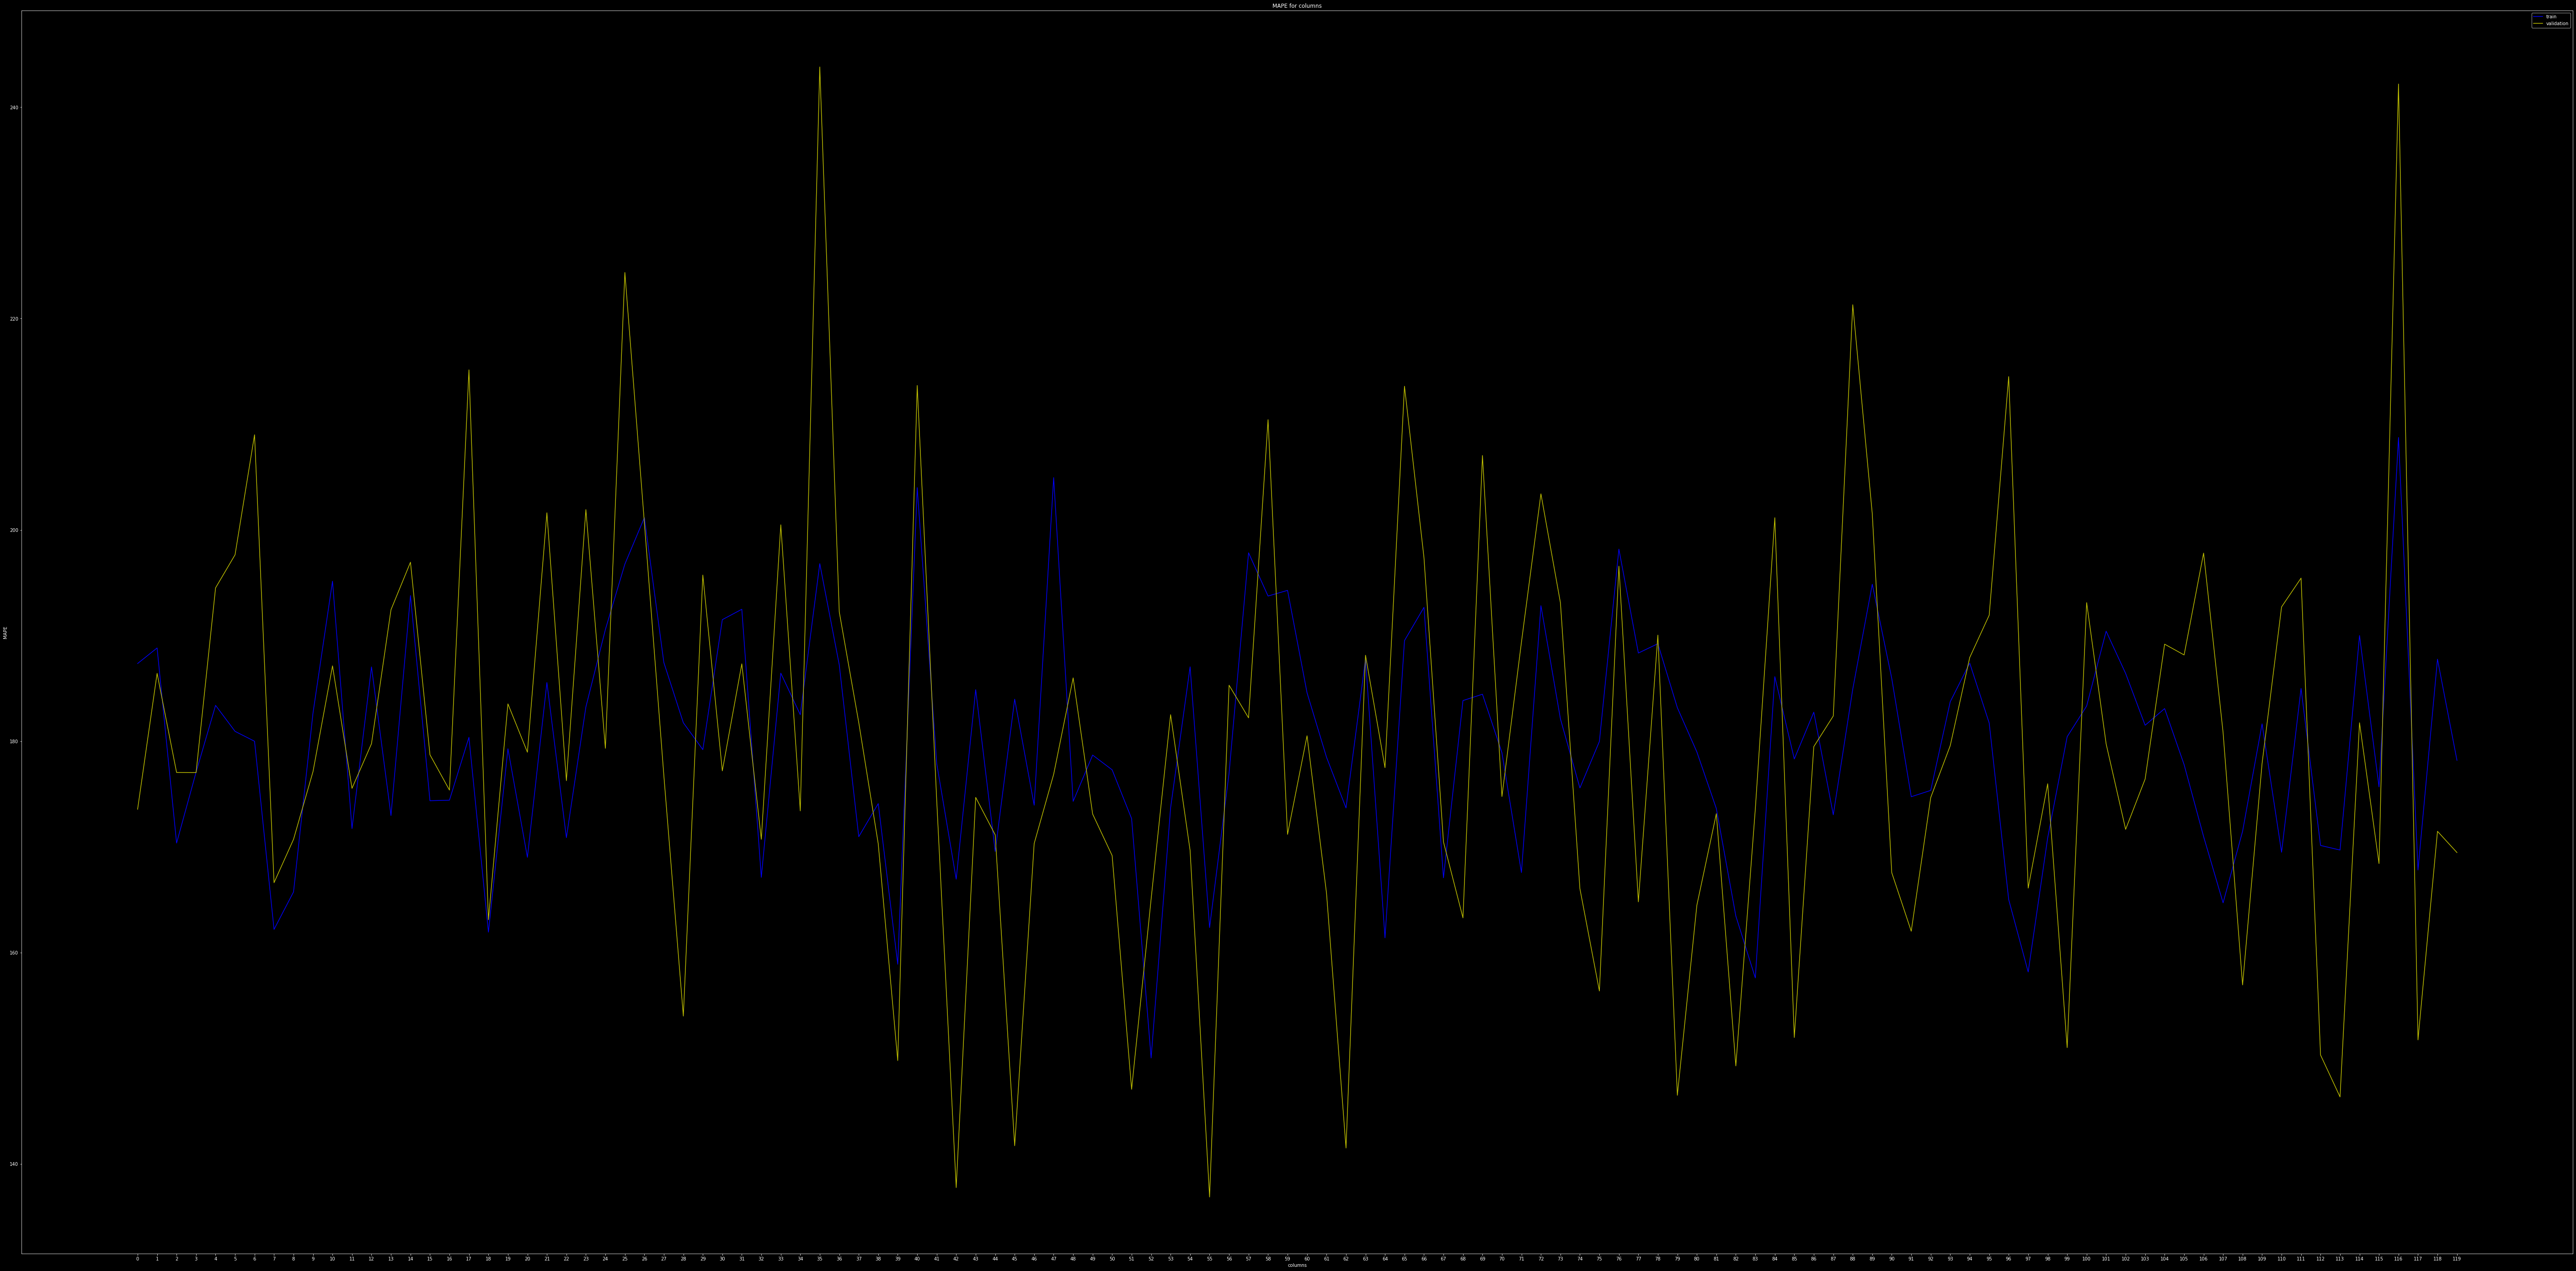

In [20]:
plt.figure(figsize=(100,50))
plt.plot( mape_tr, c = 'b', label='train')
plt.plot( mape_val, c = 'y', label='validation')
plt.legend()
plt.xticks(range(X_val.shape[1]))
plt.title("MAPE for columns")
plt.xlabel("columns")
plt.ylabel("MAPE")
plt.show()

### Define Variables for another probedate

In [ ]:
#For Reading/Writing
PROBE_DATE = '2022-02-20'
CURRENT_VERSION = 0
BUCKET_STRING = "s3a://9262-4618-2427-mrp-cat-kms/users/k30577/"
RANDOM_SEED = 42
TRAIN_PROPORTION = 0.75
#SLICES = 6 #(chosen in last step of process)

In [ ]:
#Sampling Method 1
Final_IV_Data_Sample = read_pipeline_parquet(BUCKET_STRING, "actrain9_IV_normalized_rows_030_1ea",PROBE_DATE, version = CURRENT_VERSION)

In [ ]:
#Sampling Method 2

Final_IV_Data_Sample = read_pipeline_parquet(BUCKET_STRING,"actrain9_IV_normalized_rows_005", PROBE_DATE, version=CURRENT_VERSION)

In [ ]:
# change data to pandas format
Final_IV_Data_Sample_Pre_PD = Final_IV_Data_Sample.select('chain_id', 'all_items')

In [ ]:
Final_IV_Data_Sample_PD = Final_IV_Data_Sample_Pre_PD.toPandas()

In [ ]:
Final_IV_Data_Sample_PD['np_items'] = Final_IV_Data_Sample_PD['all_items'J.to_numpy()
Final_IV_Data_Sample_PD['np_items_1st'] = Final_IV_Data_Sample_PD['np_items'].str[0]
Final_IV_Data_Sample_PD_DeNan= Final_IV_Data_Sample_PD[Final_IV_Data_Sample_PD['np_items_1st'].isna()==False]
                                                                                                                         

In [ ]:
num_events = len(Final_IV_Data_Sample_PD_DeNan)

#num_events = Len(Final_IV_Data_002_Sample_PD_DeNan)
train_val_df = Final_IV_Data_Sample_PD_DeNan.sample(frac=1, random_state = RANDOM_SEED).reset_index()

In [ ]:
X = np.stack(train_val_df['all_items'].to_numpy(), axis=0)
X = X.reshape(*(list(X.shape)+[1]))

In [ ]:
x_pred = model.predict(X)

In [ ]:
### Drop Duplicates and Keep Last Row
num_dups = len(train_val_df)-len(train_val_df.drop_duplicates(keep='last'))
num_dups

In [ ]:
X_flt = X.flatten()
x_pred_flt = x_pred.flatten()

mae = mean_squared_error(X_flt, x_pred_flt)
print(f'mae : {mae}\n')


mape = mape(X_flt,x_pred_flt, replc_val_mape)
print(f'mape : {mape}\n')


### evaluate metrics

In [ ]:
mets = []
values = []

mets.append('mean_squared_error')
values.append(mean_squared_error(X, x_pred))

mets.append('mean_absolute_error')
values.append(mean_absolute_error(X, x_pred))

mets.append('r2_multi_output_regres')
values.append(MultiOutputRegressor(Ridge(random_state=123)).fit(X, x_pred).score(X, x_pred))

mets.append('r2_sklearn')
values.append(r2_score(X, x_pred))

metrics3 = pd.DataFrame({'metrics' : mets, 'values' : values })
metrics3

In [ ]:
x5 = sm.add_constant(X_flt)
reg_3 = sm.OLS(x_pred_flt, x5).fit()
reg_3.summary()